# Pixelwise Visible Ground Plane and Complete Ground Plane

In [60]:
import os
import numpy as np
import pandas as pd
import scipy
import path 
from matplotlib import pyplot as plt
import json
from PIL import Image, ImageStat
from sklearn.linear_model import LinearRegression
from scipy import stats
import math

## Load Behavioral Data

In [268]:

# dpath = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/finalVEMatched/z_scored/'

dpath = '/Users/pmahableshwarkar/Documents/Depth_Project/verbal_judgement_analysis/data/finalVEMatched/z_scored/'


# stim 
with open(dpath + 'z_final_stim_125.npy' , 'rb') as f:
    stim_125 = np.load(f, allow_pickle=True)
    
with open(dpath + 'z_final_stim_250.npy' , 'rb') as f:
    stim_250 = np.load(f, allow_pickle=True)

with open(dpath + 'z_final_stim_1000.npy' , 'rb') as f:
    stim_1000 = np.load(f, allow_pickle=True)
    
# std 
with open(dpath + 'z_std_125.npy' , 'rb') as f:
    std_125 = np.load(f, allow_pickle=True)
    
with open(dpath + 'z_std_250.npy' , 'rb') as f:
    std_250 = np.load(f, allow_pickle=True)

with open(dpath + 'z_std_1000.npy' , 'rb') as f:
    std_1000 = np.load(f, allow_pickle=True)

# x data
with open(dpath + 'X_125.npy' , 'rb') as f:
    X_125 = np.load(f, allow_pickle=True)
with open(dpath + 'X_250.npy' , 'rb') as f:
    X_250 = np.load(f, allow_pickle=True)
with open(dpath + 'X_1000.npy' , 'rb') as f:
    X_1000 = np.load(f, allow_pickle=True)

# y data 
with open(dpath + 'z_final_y_125.npy' , 'rb') as f:
    y_125 = np.load(f, allow_pickle=True)
with open(dpath + 'z_final_y_250.npy' , 'rb') as f:
    y_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'z_final_y_1000.npy' , 'rb') as f:
    y_1000= np.load(f, allow_pickle=True)
    
# residuals
with open(dpath + 'residuals/'+ 'residuals_125.npy' , 'rb') as f:
    residuals_125 = np.load(f, allow_pickle=True)
with open(dpath + 'residuals/'+ 'residuals_250.npy' , 'rb') as f:
    residuals_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'residuals/'+ 'residuals_1000.npy' , 'rb') as f:
    residuals_1000= np.load(f, allow_pickle=True)

In [130]:
stimfolder_125 = [elem.split('/')[1][:-2] for elem in stim_125]
stimfolder_250 = [elem.split('/')[1][:-2] for elem in stim_250]
stimfolder_1000 = [elem.split('/')[1][:-2] for elem in stim_1000]


## Load Ground Plane Metrics: Pixel Sum

In [309]:
# path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/SUN_scene_cue_coding/gp_metrics.json'
path = '/Users/pmahableshwarkar/Documents/Depth_Project/SUN_scene_cue_coding/gp_metrics.json'
gp_metrics = json.load(open(path))
# [percent_VGP_GP, percent_VGP_image, percent_GP_image]

In [310]:
ordered_gp_metrics = []
c_none = 0
for folder in stimfolder_250:
    try:
        ordered_gp_metrics.append(gp_metrics[folder])
    except:
        c_none += 1
        ordered_gp_metrics.append(None)

In [311]:
len(ordered_gp_metrics), c_none

(156, 0)

In [312]:
actual_depth_values = []
for i in range(len(stim_250)):
    targetobj_num = stim_250[i].split('/')[1][-1]
    folder = stimfolder_250[i]
#     p = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli/' + folder + "_" + targetobj_num
    p = '/Users/pmahableshwarkar/Documents/Depth_Project/final_stimuli/' + folder + '_' + targetobj_num
    # JSON file
    f = open (p + '/data.json', "r")
    # Reading from file
    data = json.loads(f.read())
    depthval = data['objects'][0]['crossing_point'][0]['depth']
    actual_depth_values.append(depthval)
len(actual_depth_values)

156

In [313]:
trunc_resid_125 = []
trunc_resid_250 = []
trunc_resid_1000 = []
trunc_vgp_gp = []
trunc_vgp = []
trunc_gp = []
trunc_actual = []
trunc_std_125 = []
trunc_std_250 = []
trunc_std_1000 = []

for i in range(len(ordered_gp_metrics)):
    metrics = ordered_gp_metrics[i]
    if type(metrics) == list:
        trunc_vgp_gp.append(metrics[0])
        trunc_vgp.append(metrics[1])
        trunc_gp.append(metrics[2])
        
        trunc_resid_125.append(residuals_125[i])
        trunc_resid_250.append(residuals_250[i])
        trunc_resid_1000.append(residuals_1000[i])
        
        trunc_actual.append(actual_depth_values[i])
        
        trunc_std_125.append(std_125[i])
        trunc_std_250.append(std_250[i])
        trunc_std_1000.append(std_1000[i])
         


In [314]:
len(trunc_vgp_gp), len(trunc_resid_250)

(156, 156)

In [315]:
print(stats.pearsonr(trunc_resid_125, trunc_pitches))
print(stats.pearsonr(trunc_resid_250, trunc_pitches))
print(stats.pearsonr(trunc_resid_1000, trunc_pitches))

(0.08698929499339848, 0.2802285143839474)
(0.05281568712275304, 0.512583920525271)
(0.12026087388742505, 0.1348073948642479)


(array([ 8., 11., 15., 26., 28., 27., 21.,  9.,  5.,  6.]),
 array([0.00108785, 0.10127272, 0.20145759, 0.30164247, 0.40182734,
        0.50201221, 0.60219709, 0.70238196, 0.80256683, 0.90275171,
        1.00293658]),
 <a list of 10 Patch objects>)

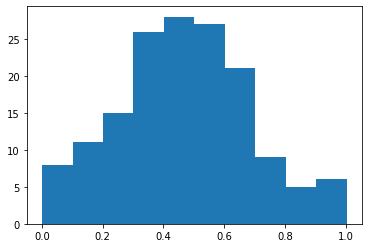

In [316]:
plt.hist(trunc_vgp_gp)

In [317]:
# corr, p-value
print('Correlation between Linear Model Residuals and VGP/GP')
print('125 ms: ',stats.pearsonr(trunc_resid_125, trunc_vgp_gp))
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_vgp_gp))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_vgp_gp))

Correlation between Linear Model Residuals and VGP/GP
125 ms:  (0.02279581796609581, 0.7775858120408209)
250 ms:  (-0.09989981726106886, 0.2146723180120353)
1000 ms:  (-0.009300701626811242, 0.9082596891847373)


In [318]:
# corr, p-value
print('Correlation between Linear Model Residuals and VGP')
print('125 ms: ',stats.pearsonr(trunc_resid_125, trunc_vgp))
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_vgp))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_vgp))

Correlation between Linear Model Residuals and VGP
125 ms:  (-0.059952564984885416, 0.4572068063899042)
250 ms:  (-0.153161004213003, 0.056278412334716664)
1000 ms:  (-0.12446793611946573, 0.12159157090063621)


In [319]:
# corr, p-value
print('Correlation between Linear Model Residuals and GP')
print('125 ms: ',stats.pearsonr(trunc_resid_125, trunc_gp))
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_gp))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_gp))

Correlation between Linear Model Residuals and GP
125 ms:  (-0.22506269883496852, 0.004731632520134334)
250 ms:  (-0.12240858201574957, 0.127929580268641)
1000 ms:  (-0.23695031169293124, 0.0028990977129283737)


#### Absolute value of residuals

In [320]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and VGP/GP')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), trunc_vgp_gp))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_vgp_gp))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_vgp_gp))

# interp: clutter (pixel space)

Correlation between Abs(Linear Model Residuals) and VGP/GP
125 ms:  (-0.12933858688016495, 0.10756979552119636)
250 ms:  (-0.016346515826906764, 0.839495040602256)
1000 ms:  (-0.0563304516289159, 0.4848873565181206)


In [321]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and GP')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), trunc_gp))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_gp))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_gp))

Correlation between Abs(Linear Model Residuals) and GP
125 ms:  (-0.09707677355148822, 0.22797687611471187)
250 ms:  (0.0022964232477232166, 0.9773019096309028)
1000 ms:  (-0.09152719014738403, 0.2558029013500885)


In [322]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and VGP')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), trunc_vgp))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_vgp))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_vgp))

Correlation between Abs(Linear Model Residuals) and VGP
125 ms:  (-0.1393683402908968, 0.0827073392926528)
250 ms:  (-0.005826480839682568, 0.9424522495370526)
1000 ms:  (-0.08375061521564309, 0.2985911083472283)


m: [-0.05075265]
b: 0.6197798501913753
R-squared:  0.0002672085796793233


0.0

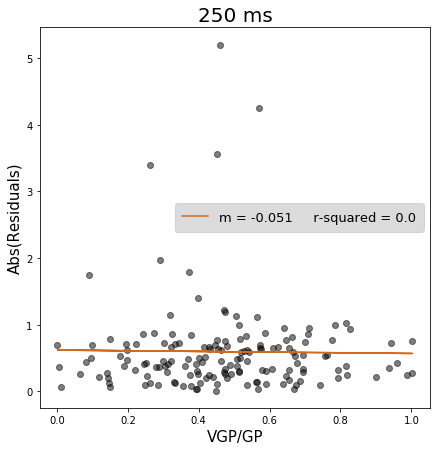

In [323]:
plt.figure(figsize = [7,7])
#run regression
X = np.array(trunc_vgp_gp).reshape(-1,1)
y = np.abs(trunc_resid_250)
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("VGP/GP", fontsize = 15)
plt.ylabel("Abs(Residuals)", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

#### Actual Depth

In [324]:
print('Correlation between Actual Depth and VGP/GP')
print(stats.pearsonr(trunc_actual, trunc_vgp_gp))
print('Correlation between Actual Depth and VGP')
print(stats.pearsonr(trunc_actual, trunc_vgp))
print('Correlation between Actual Depth and GP')
print(stats.pearsonr(trunc_actual, trunc_gp))

Correlation between Actual Depth and VGP/GP
(-0.08712410753715587, 0.2794809959214527)
Correlation between Actual Depth and VGP
(0.04754284307903839, 0.5556146971691864)
Correlation between Actual Depth and GP
(0.16743673736446735, 0.03668635251276759)


m: [-1.12181847]
b: 0.5623961600266761
R-squared:  0.05614545021137718


0.056

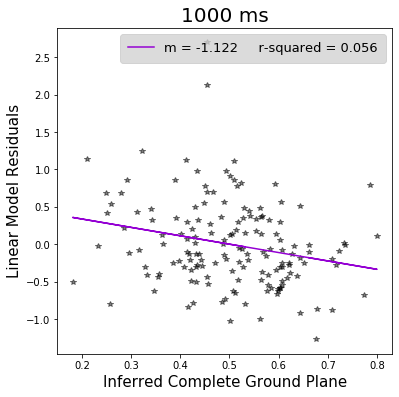

In [325]:
plt.figure(figsize = [6,6])
#run regression
X = np.array(trunc_gp).reshape(-1,1)
y = trunc_resid_1000
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, '*', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='darkviolet', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("1000 ms", fontsize = 20)
plt.xlabel("Inferred Complete Ground Plane", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

m: [-1.25210033]
b: 0.28772162439851034
R-squared:  0.023458293211535475


0.023

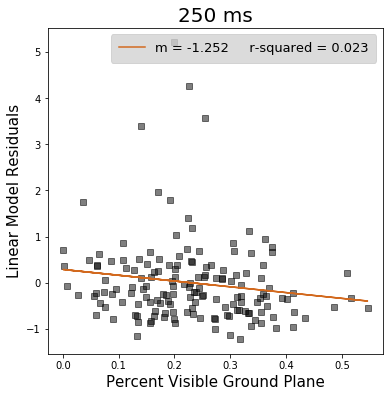

In [326]:
plt.figure(figsize = [6,6])
#run regression
X = np.array(trunc_vgp).reshape(-1,1)
y = trunc_resid_250
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 's', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("Percent Visible Ground Plane", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

m: [-0.41383828]
b: 0.19492515576667016
R-squared:  0.00997997348879509


0.01

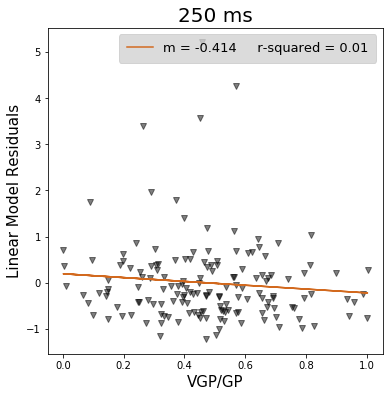

In [327]:
plt.figure(figsize = [6,6])
#run regression
X = np.array(trunc_vgp_gp).reshape(-1,1)
y = trunc_resid_250
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'v', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("VGP/GP", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

## Global Mean Depth

In [328]:
# kinect192_path = '/Users/prachimahableshwarkar/Documents/GW/SUNRGBD/updated/kinect2data_192'
kinect192_path = '/Users/pmahableshwarkar/Documents/Depth_Project/SUNRGBD/kinect2data_192'

# stimuli_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli'
stimuli_path = '/Users/pmahableshwarkar/Documents/Depth_Project/final_stimuli'

In [329]:
globalMeanDepths = []
for folder in stimfolder_250:
    for file in os.listdir(kinect192_path + '/' + folder + '/depth_bfx'):
        if 'png' in file:
            dm = Image.open(kinect192_path + '/' + folder + '/depth_bfx/' + file)
            dm.load()
            depth_data = np.asarray(dm)/8000
            globalMeanDepths.append(np.mean(depth_data))

In [330]:
trunc_globalMeanDepths = []

for i in range(len(ordered_gp_metrics)):
    metrics = ordered_gp_metrics[i]
    if type(metrics) == list:
        trunc_globalMeanDepths.append(globalMeanDepths[i])


In [331]:
print('Correlation between Global Mean Depth and Complete Ground Plane')
print(stats.pearsonr(trunc_globalMeanDepths, trunc_gp))

Correlation between Global Mean Depth and Complete Ground Plane
(0.2999983504198189, 0.00014188365894478912)


m: [0.08390167]
b: 0.2844751501870869
R-squared:  0.08999901025461254


0.09

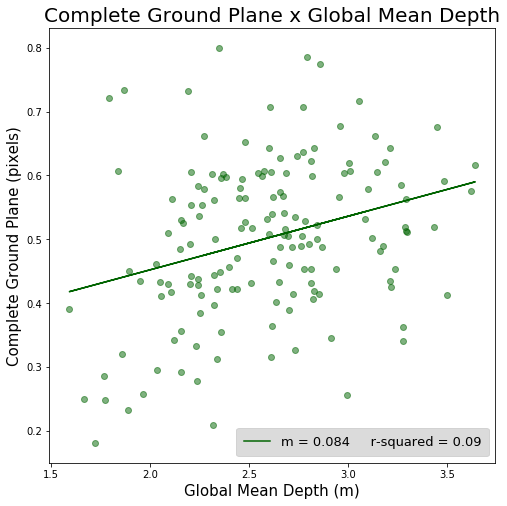

In [332]:
plt.figure(figsize = [8,8])
#run regression
X = np.array(trunc_globalMeanDepths).reshape(-1,1)
y = trunc_gp
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='darkgreen', alpha = 0.5);
plt.plot(X,y_predicted,color='darkgreen', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("Complete Ground Plane x Global Mean Depth", fontsize = 20)
plt.xlabel("Global Mean Depth (m)", fontsize = 15)
plt.ylabel("Complete Ground Plane (pixels)", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

### Clutter: Pixel Sum Method; GP - VGP

In [333]:
clutter_pixel = (np.array(trunc_gp) - np.array(trunc_vgp))

In [334]:
# corr, p-value
print('Correlation between Linear Model Residuals and Clutter (pixel sum)')
print('125 ms: ',stats.pearsonr(trunc_resid_125, clutter_pixel))
print('250 ms: ',stats.pearsonr(trunc_resid_250, clutter_pixel))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, clutter_pixel))

Correlation between Linear Model Residuals and Clutter (pixel sum)
125 ms:  (-0.15436316473643044, 0.05434985287983599)
250 ms:  (0.014225589285517905, 0.8600916533781692)
1000 ms:  (-0.11255266824039245, 0.16183528698310004)


## Load Ground Plane Metrics: Pixel SA

In [335]:
path = '/Users/pmahableshwarkar/Documents/Depth_Project/SUN_scene_cue_coding/VGP_size_dict.json'
# path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/SUN_scene_cue_coding/VGP_size_dict.json'
vgp_size_dict = json.load(open(path))


In [336]:
path = '/Users/pmahableshwarkar/Documents/Depth_Project/SUN_scene_cue_coding/GP_size_dict.json'
# path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/SUN_scene_cue_coding/GP_size_dict.json'
gp_size_dict = json.load(open(path))

In [337]:
# Find GP or VGP Outliers 

gpsize_list = [[key, gp_size_dict[key]] for key in gp_size_dict]
gpsize_mean = np.mean(np.array([elem[1] for elem in gpsize_list]))
gpsize_std = np.std(np.array([elem[1] for elem in gpsize_list]))

gpsize_outlierRange = [gpsize_mean - (3*gpsize_std), gpsize_mean + (3*gpsize_std)]

cleaned_gpsize_dict = {}
for key in gp_size_dict:
    if gpsize_outlierRange[0] < gp_size_dict[key] < gpsize_outlierRange[1]:
        cleaned_gpsize_dict[key] = gp_size_dict[key]
    else:
        print(key, 'excluded')

000109_2014-05-14_23-41-52_260595134347_rgbf000035-resize excluded
000409_2014-06-04_19-23-33_260595134347_rgbf000067-resize excluded


In [338]:
# Find GP or VGP Outliers 

vgpsize_list = [[key, vgp_size_dict[key]] for key in vgp_size_dict]
vgpsize_mean = np.mean(np.array([elem[1] for elem in vgpsize_list]))
vgpsize_std = np.std(np.array([elem[1] for elem in vgpsize_list]))

vgpsize_outlierRange = [gpsize_mean - (3*gpsize_std), gpsize_mean + (3*gpsize_std)]

cleaned_vgpsize_dict = {}
for key in vgp_size_dict:
    if vgpsize_outlierRange[0] < vgp_size_dict[key] < vgpsize_outlierRange[1]:
        cleaned_vgpsize_dict[key] = vgp_size_dict[key]
    else:
        print(key, 'excluded')

In [339]:
ordered_gp_size = []
ordered_vgp_size = []

gp_none = 0
vgp_none = 0
for folder in stimfolder_250:
    try:
        ordered_gp_size.append(cleaned_gpsize_dict[folder])
    except:
        gp_none += 1
        ordered_gp_size.append(None)
    try:
        ordered_vgp_size.append(cleaned_vgpsize_dict[folder])
    except:
        vgp_none += 1
        ordered_vgp_size.append(None)

In [340]:
len(ordered_gp_size), gp_none

(156, 7)

In [341]:
len(ordered_vgp_size), vgp_none

(156, 5)

In [342]:
actual_depth_values = []
for i in range(len(stim_250)):
    targetobj_num = stim_250[i].split('/')[1][-1]
    folder = stimfolder_250[i]
#     p = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli/' + folder + "_" + targetobj_num
    p = '/Users/pmahableshwarkar/Documents/Depth_Project/final_stimuli/' + folder + '_' + targetobj_num
    # JSON file
    f = open (p + '/data.json', "r")
    # Reading from file
    data = json.loads(f.read())
    depthval = data['objects'][0]['crossing_point'][0]['depth']
    actual_depth_values.append(depthval)
len(actual_depth_values)

156

In [343]:
trunc_resid_125 = []
trunc_resid_250 = []
trunc_resid_1000 = []

trunc_vgpSize_gpSize = []
trunc_vgpSize = []
trunc_gpSize = []
trunc_actual = []

trunc_std_125 = []
trunc_std_250 = []
trunc_std_1000 = []


for i in range(len(actual_depth_values)):
    if type(ordered_gp_size[i]) == float:        
        trunc_vgpSize_gpSize.append(ordered_vgp_size[i]/ordered_gp_size[i])
        trunc_vgpSize.append(ordered_vgp_size[i])
        trunc_gpSize.append(ordered_gp_size[i])
        
        trunc_resid_125.append(residuals_125[i])        
        trunc_resid_250.append(residuals_250[i])
        trunc_resid_1000.append(residuals_1000[i])
        
        trunc_actual.append(actual_depth_values[i])
        
        trunc_std_125.append(std_125[i])
        trunc_std_250.append(std_250[i])
        trunc_std_1000.append(std_1000[i])
         


In [344]:
len(trunc_vgpSize_gpSize), len(trunc_resid_250)

(149, 149)

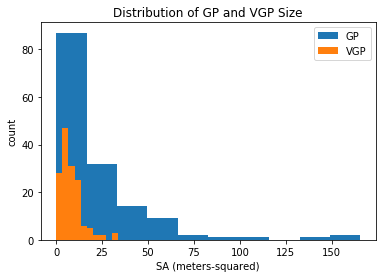

In [345]:
plt.title('Distribution of GP and VGP Size')
plt.hist(trunc_gpSize, label='GP')
plt.hist(trunc_vgpSize, label='VGP')

plt.ylabel('count')
plt.xlabel('SA (meters-squared)')

plt.legend()
plt.show();

In [346]:
# corr, p-value
print('Correlation between Linear Model Residuals and VGP/GP SA')
print('125 ms: ',stats.pearsonr(trunc_resid_125, trunc_vgpSize_gpSize))
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_vgpSize_gpSize))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_vgpSize_gpSize))

Correlation between Linear Model Residuals and VGP/GP SA
125 ms:  (-0.05386109805896294, 0.5141462040006036)
250 ms:  (0.008690758535500106, 0.9162228332436645)
1000 ms:  (0.05700527123443866, 0.4898549107312183)


In [347]:
# corr, p-value
print('Correlation between Linear Model Residuals and VGP SA')
print('125 ms: ',stats.pearsonr(trunc_resid_125, trunc_vgpSize))
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_vgpSize))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_vgpSize))

Correlation between Linear Model Residuals and VGP SA
125 ms:  (-0.0754591398454198, 0.3603786744039466)
250 ms:  (-0.14444886285724612, 0.07881500865520226)
1000 ms:  (-0.15470259249221904, 0.05958666701980854)


In [348]:
# corr, p-value
print('Correlation between Linear Model Residuals and GP SA')
print('125 ms: ',stats.pearsonr(trunc_resid_125, trunc_gpSize))
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_gpSize))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_gpSize))

Correlation between Linear Model Residuals and GP SA
125 ms:  (-0.11472532736211456, 0.16355576084034876)
250 ms:  (-0.10916106689485827, 0.1850973279513889)
1000 ms:  (-0.22627731782886565, 0.0055220301348617214)


### STANDARD DEVIATION

In [349]:
# corr, p-value
print('Correlation between SD and VGP/GP SA')
print('125 ms: ',stats.pearsonr(trunc_std_125, trunc_vgpSize_gpSize))
print('250 ms: ',stats.pearsonr(trunc_std_250, trunc_vgpSize_gpSize))
print('1000 ms: ',stats.pearsonr(trunc_std_1000, trunc_vgpSize_gpSize))

Correlation between SD and VGP/GP SA
125 ms:  (-0.05002051139204312, 0.5446373509757373)
250 ms:  (-0.02650672722926271, 0.7482957945117023)
1000 ms:  (-0.025077278417045816, 0.7614502034681269)


In [350]:
# corr, p-value
print('Correlation between SD and VGP SA')
print('125 ms: ',stats.pearsonr(trunc_std_125, trunc_vgpSize))
print('250 ms: ',stats.pearsonr(trunc_std_250, trunc_vgpSize))
print('1000 ms: ',stats.pearsonr(trunc_std_1000, trunc_vgpSize))

Correlation between SD and VGP SA
125 ms:  (-0.014885685194094054, 0.8570091751178855)
250 ms:  (0.06510018936724042, 0.4302324741382267)
1000 ms:  (0.0968411099357184, 0.24003284208162834)


In [351]:
# corr, p-value
print('Correlation between SD and GP SA')
print('125 ms: ',stats.pearsonr(trunc_std_125, trunc_gpSize))
print('250 ms: ',stats.pearsonr(trunc_std_250, trunc_gpSize))
print('1000 ms: ',stats.pearsonr(trunc_std_1000, trunc_gpSize))

Correlation between SD and GP SA
125 ms:  (-0.006253323950166451, 0.9396661829915488)
250 ms:  (0.09430404448094348, 0.25263008991355046)
1000 ms:  (0.12593187786517376, 0.1259307157143117)


#### Absolute value of residuals

In [352]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and VGP/GP')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), trunc_vgpSize_gpSize))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_vgpSize_gpSize))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_vgpSize_gpSize))

# interp: clutter (pixel space)

Correlation between Abs(Linear Model Residuals) and VGP/GP
125 ms:  (-0.11006689121763094, 0.18145567108042804)
250 ms:  (-0.03046220268888087, 0.7122823024114662)
1000 ms:  (-0.13238255346965094, 0.10752507031662879)


In [353]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and VGP')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), trunc_vgpSize))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_vgpSize))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_vgpSize))

Correlation between Abs(Linear Model Residuals) and VGP
125 ms:  (-0.0212271513852206, 0.7972118305467858)
250 ms:  (-0.04526756517206559, 0.5835623972945126)
1000 ms:  (0.040637292340554805, 0.6226718817375855)


In [354]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and GP')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), trunc_gpSize))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_gpSize))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_gpSize))

Correlation between Abs(Linear Model Residuals) and GP
125 ms:  (0.05456720640455163, 0.5086374854382874)
250 ms:  (0.018091267074571503, 0.8266577044103268)
1000 ms:  (0.13676676833397577, 0.09626915383578753)


m: [-0.01367467]
b: 0.10738940321582595
R-squared:  0.02393289212381355


0.024

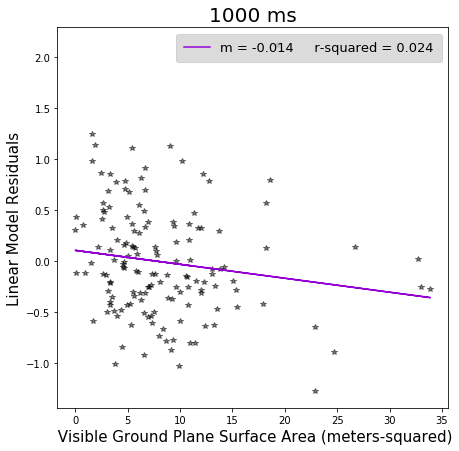

In [355]:
plt.figure(figsize = [7,7])
#run regression
X = np.array(trunc_vgpSize).reshape(-1,1)
y = trunc_resid_1000
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, '*', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='darkviolet', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("1000 ms", fontsize = 20)
plt.xlabel(" Visible Ground Plane Surface Area (meters-squared)", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

In [356]:
# plt.figure(figsize = [7,7])
# #run regression
# X = np.array(trunc_gpSize).reshape(-1,1)
# y = np.abs(trunc_resid_1000)
# reg = LinearRegression().fit(X, y)

# #Generated Predictions
# y_predicted = reg.predict(X)
# #Plot Our Actual and Predicted Values
# plt.plot(X, y, 'o', color='black', alpha = 0.5);
# plt.plot(X,y_predicted,color='darkviolet', label = 'm = ' + str(round(reg.coef_[0], 3))
#          + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
# plt.title("1000 ms", fontsize = 20)
# plt.xlabel("Ground Plane Surface Area (meters-squared)", fontsize = 15)
# plt.ylabel("Linear Model Residuals", fontsize = 15)

# legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
# legend.get_frame().set_facecolor('lightgray')


# #get coefficients and y intercept
# print("m: {0}".format(reg.coef_))
# print("b: {0}".format(reg.intercept_))

# #Returns the coefficient of determination R^2 of the prediction.
# print("R-squared: ", reg.score(X, y))

# round(float(reg.score(X, y)), 3)

#### Actual Depth

In [357]:
print('Correlation between Actual Depth and VGP/GP')
print(stats.pearsonr(trunc_actual, trunc_vgpSize_gpSize))
print('Correlation between Actual Depth and VGP')
print(stats.pearsonr(trunc_actual, trunc_vgpSize))
print('Correlation between Actual Depth and GP')
print(stats.pearsonr(trunc_actual, trunc_gpSize))

Correlation between Actual Depth and VGP/GP
(0.15162167172367, 0.06490988621576034)
Correlation between Actual Depth and VGP
(0.13839907713792182, 0.09232499104443023)
Correlation between Actual Depth and GP
(0.0021178828526411545, 0.9795489788426511)


m: [-0.02169306]
b: 0.19080705838919312
R-squared:  0.02086547398075167


0.021

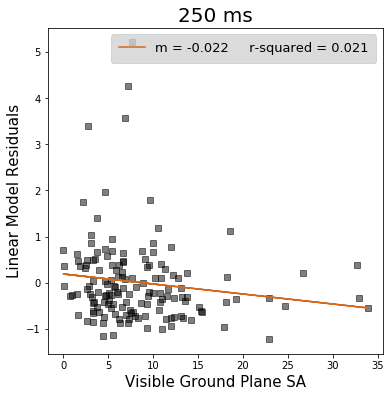

In [358]:
plt.figure(figsize = [6,6])
#run regression
X = np.array(trunc_vgpSize).reshape(-1,1)
y = trunc_resid_250
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 's', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("Visible Ground Plane SA", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

m: [-0.02169306]
b: 0.19080705838919312
R-squared:  0.02086547398075167


0.021

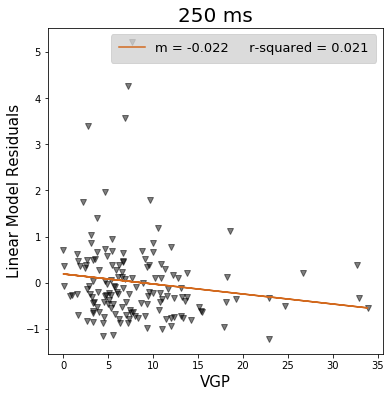

In [359]:
plt.figure(figsize = [6,6])
#run regression
X = np.array(trunc_vgpSize).reshape(-1,1)
y = trunc_resid_250
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'v', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("VGP", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

## Global Mean Depth

In [360]:
# kinect192_path = '/Users/prachimahableshwarkar/Documents/GW/SUNRGBD/updated/kinect2data_192'

# stimuli_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli'

In [361]:
globalMeanDepths = []
for folder in stimfolder_250:
    for file in os.listdir(kinect192_path + '/' + folder + '/depth_bfx'):
        if 'png' in file:
            dm = Image.open(kinect192_path + '/' + folder + '/depth_bfx/' + file)
            dm.load()
            depth_data = np.asarray(dm)/8000
            globalMeanDepths.append(np.mean(depth_data))

In [362]:
trunc_globalMeanDepths = []

for i in range(len(ordered_gp_size)):
    if type(ordered_gp_size[i]) == float:
        trunc_globalMeanDepths.append(globalMeanDepths[i])


In [363]:
print('Correlation between Global Mean Depth and Complete Ground Plane')
print(stats.pearsonr(trunc_globalMeanDepths, trunc_gpSize))

Correlation between Global Mean Depth and Complete Ground Plane
(0.29211855534039816, 0.00030045642978995655)


m: [17.53990948]
b: -22.297939447106252
R-squared:  0.08533325037416128


0.085

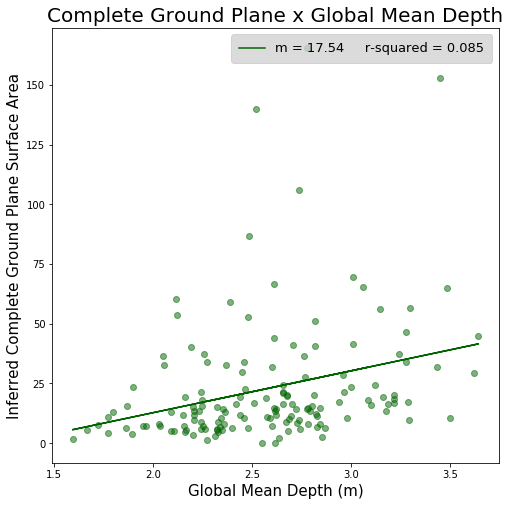

In [364]:
plt.figure(figsize = [8,8])
#run regression
X = np.array(trunc_globalMeanDepths).reshape(-1,1)
y = trunc_gpSize
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='darkgreen', alpha = 0.5);
plt.plot(X,y_predicted,color='darkgreen', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("Complete Ground Plane x Global Mean Depth", fontsize = 20)
plt.xlabel("Global Mean Depth (m)", fontsize = 15)
plt.ylabel("Inferred Complete Ground Plane Surface Area", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

## GP Defined Clutter 

In [365]:
clutter_size = (np.array(trunc_gpSize) - np.array(trunc_vgpSize)) 


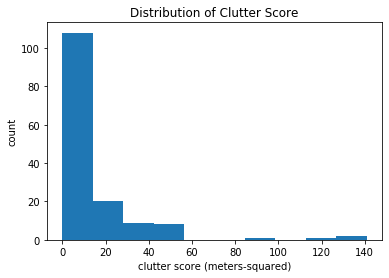

In [366]:
plt.title('Distribution of Clutter Score')
plt.hist(clutter_size)

plt.ylabel('count')
plt.xlabel('clutter score (meters-squared)')

plt.show();

In [367]:
# corr, p-value
print('Correlation between Linear Model Residuals and Clutter(size)')
print('125 ms: ',stats.pearsonr(trunc_resid_125, clutter_size))
print('250 ms: ',stats.pearsonr(trunc_resid_250, clutter_size))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, clutter_size))

Correlation between Linear Model Residuals and Clutter(size)
125 ms:  (-0.11192961564216329, 0.17413290305318613)
250 ms:  (-0.08671242401373128, 0.29301619242469656)
1000 ms:  (-0.21916391629391452, 0.007243531843058994)


In [368]:
# corr, p-value
print('Correlation between Linear Model Residuals and Clutter(size)')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), clutter_size))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), clutter_size))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), clutter_size))

Correlation between Linear Model Residuals and Clutter(size)
125 ms:  (0.06879547556210024, 0.4044659410678529)
250 ms:  (0.033221707737520194, 0.6875232676169958)
1000 ms:  (0.14686769728537488, 0.07388002294005801)


m: [-0.00527678]
b: 0.0697015787831955
R-squared:  0.04803282220528593


0.048

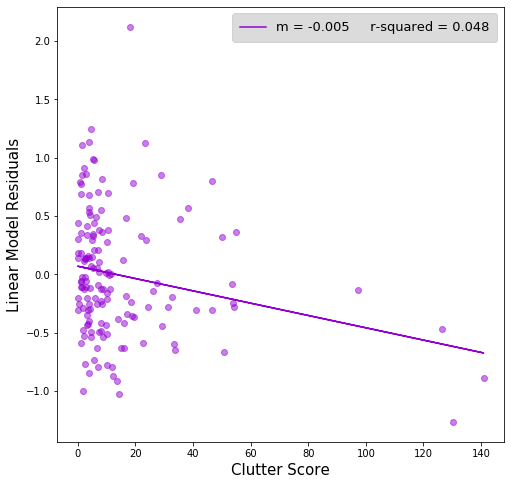

In [369]:
plt.figure(figsize = [8,8])
#run regression
X = np.array(clutter_size).reshape(-1,1)
y = trunc_resid_1000
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='darkviolet', alpha = 0.5);
plt.plot(X,y_predicted,color='darkviolet', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
# plt.title("Clutter x Model Error", fontsize = 20)
plt.xlabel("Clutter Score", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

# Extrinsics

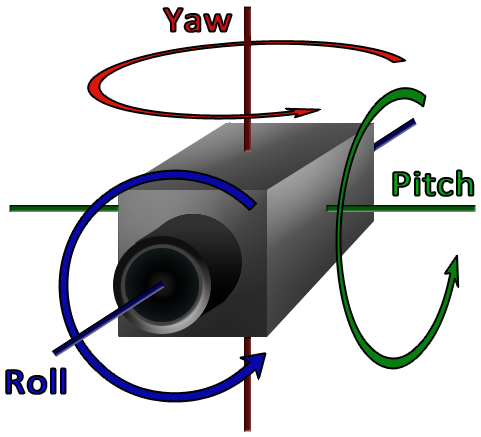

In [229]:
#converts the rotation matrix in extrinsics.txt from string to a numpy array 
def rotationmatrix(matrix_path):
    matrixtext = open(matrix_path).read()
    
    x00 = float(matrixtext.split('\t')[0].split(' ')[0])
    x01 = float(matrixtext.split('\n')[0].split(' ')[1])
    x02 = float(matrixtext.split('\n')[0].split(' ')[2])
    
    x10 = float(matrixtext.split('\n')[1].split(' ')[0])
    x11 = float(matrixtext.split('\n')[1].split(' ')[1])
    x12 = float(matrixtext.split('\n')[1].split(' ')[2])
    
    x20 = float(matrixtext.split('\n')[2].split(' ')[0])
    x21 = float(matrixtext.split('\n')[2].split(' ')[1])
    x22 = float(matrixtext.split('\n')[2].split(' ')[2])
    
    #list of the matrix values excluding the 3rd column of just zeroes 
    matrixlist = [[x00, x01, x02], [x10, x11, x12], [x20, x21, x22]]
    
    #creates 3x3 array of the rotation matrix
    matrixarray = np.full((3,3), matrixlist)
    
    return matrixarray

def rotationMatrixToEulerAngles(path):
    R = rotationmatrix(path)
    #assert(isRotationMatrix(R))
    sy = math.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])
    singular = sy < 1e-6
    if  not singular :
        x = math.atan2(R[2,1] , R[2,2])
        y = math.atan2(-R[2,0], sy)
        z = math.atan2(R[1,0], R[0,0])
    else :
        x = math.atan2(-R[1,2], R[1,1])
        y = math.atan2(-R[2,0], sy)
        z = 0
    return np.array([x, y, z])

# Output - final pitch, roll, yaw values in radians and degrees 
def imageExtrinsics(path):
    in_array = rotationMatrixToEulerAngles(path)
    #print ("Radian values : \n", in_array) 

    degree_Values = np.degrees(in_array) 
    
    return degree_Values[0], degree_Values[1], degree_Values[2]


def extrinsics_distribution(path, kinectv2):
    targetfolder = path.split('/')[1]
    if len(targetfolder) == 59:     
        imagefolder = path.split('/')[1][:-2]
    else:
        imagefolder = path.split('/')[1][:-3]

    extpath = kinectv2 + '/' + imagefolder + '/extrinsics' 
    fname = os.listdir(extpath)[0]
    if fname != '.ipynb_checkpoints':
        extrinsics = imageExtrinsics(extpath + '/' + fname)
    # pitch, roll, yaw
    return extrinsics[0], extrinsics[1], extrinsics[2]

In [230]:
kinectv2_path = '/Users/pmahableshwarkar/Documents/Depth_Project/SUNRGBD/kinect2data_192'
# kinectv2_path = '/Users/prachimahableshwarkar/Documents/GW/SUNRGBD/updated/kinect2data_192'
# line comprehension for x(stim path) in final_x 

pitches = [extrinsics_distribution(path, kinectv2_path)[0] for path in stim_250]
rolls = [extrinsics_distribution(path, kinectv2_path)[1] for path in stim_250]
yaws = [extrinsics_distribution(path, kinectv2_path)[2] for path in stim_250]



In [231]:
trunc_pitches = []
trunc_rolls = []
trunc_yaws = []

for i in range(len(ordered_gp_metrics)):
    metrics = ordered_gp_metrics[i]
    if type(metrics) == list:
        trunc_pitches.append(pitches[i])
        trunc_rolls.append(rolls[i])
        trunc_yaws.append(yaws[i])

In [232]:
print('Correlation between Complete Ground Plane and Pitch')
print(stats.pearsonr(trunc_gp, trunc_pitches))

Correlation between Complete Ground Plane and Pitch
(-0.24556062057426326, 0.00200267048192746)


In [233]:
print('Correlation between Complete Ground Plane and Roll')
print(stats.pearsonr(trunc_gp, trunc_rolls))

Correlation between Complete Ground Plane and Roll
(0.10249815887246476, 0.20292515242437625)


In [234]:
print('Correlation between Complete Ground Plane and Yaw')
print(stats.pearsonr(trunc_gp, trunc_yaws))

Correlation between Complete Ground Plane and Yaw
(0.06637340997880946, 0.4103688725357515)


m: [-0.00629131]
b: 0.3686413906910721
R-squared:  0.0603000183768172


0.06

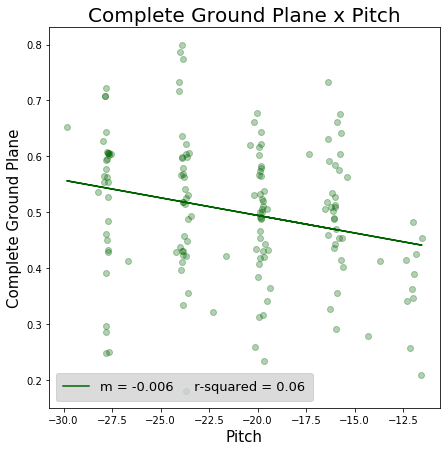

In [235]:
plt.figure(figsize = [7,7])
#run regression
X = np.array(trunc_pitches).reshape(-1,1)
y = np.abs(trunc_gp)
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='darkgreen', alpha = 0.3, marker = 'o');
plt.plot(X,y_predicted,color='darkgreen', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("Complete Ground Plane x Pitch", fontsize = 20)
plt.xlabel("Pitch", fontsize = 15)
plt.ylabel("Complete Ground Plane", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

In [236]:
print('Correlation between Complete Ground Plane and Pitch')
print(stats.pearsonr(trunc_gpSize, trunc_pitches))

Correlation between Complete Ground Plane and Pitch


ValueError: x and y must have the same length.

In [233]:
print('Correlation between Complete Ground Plane and Roll')
print(stats.pearsonr(trunc_gpSize, trunc_rolls))

Correlation between Complete Ground Plane and Roll
(0.10249815887246476, 0.20292515242437625)


In [234]:
print('Correlation between Complete Ground Plane and Yaw')
print(stats.pearsonr(trunc_gpSize, trunc_yaws))

Correlation between Complete Ground Plane and Yaw
(0.06637340997880946, 0.4103688725357515)


m: [-0.00629131]
b: 0.36864139069107216
R-squared:  0.0603000183768172


0.06

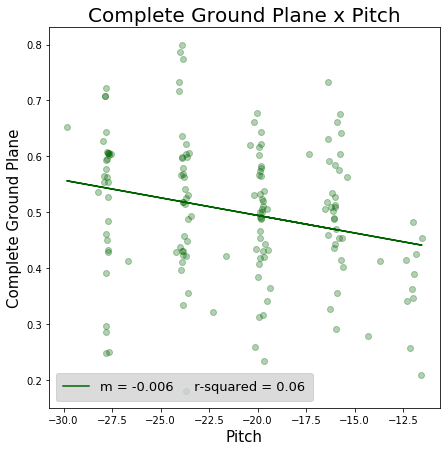

In [38]:
plt.figure(figsize = [7,7])
#run regression
X = np.array(trunc_pitches).reshape(-1,1)
y = np.abs(trunc_gp)
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='darkgreen', alpha = 0.3, marker = 'o');
plt.plot(X,y_predicted,color='darkgreen', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("Complete Ground Plane x Pitch", fontsize = 20)
plt.xlabel("Pitch", fontsize = 15)
plt.ylabel("Complete Ground Plane", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)